In [5]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df = pd.read_csv('/content/post-operative.data',header=None)

In [147]:
df.head()

,0,1,2,3,4,5,6,7,8
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       90 non-null     object
 1   1       90 non-null     object
 2   2       90 non-null     object
 3   3       90 non-null     object
 4   4       90 non-null     object
 5   5       90 non-null     object
 6   6       90 non-null     object
 7   7       90 non-null     object
 8   8       90 non-null     object
dtypes: object(9)
memory usage: 6.5+ KB


In [149]:
df.rename(columns=
               {0 : 'core_temp' ,
                1 : 'surf_temp' ,
                2 : 'o2_satur' ,
                3 : 'bp' ,
                4 : 'surf_temp_stbl' ,
                5 : 'core_temp_stbl' ,
                6 : 'bp_stbl' ,
                7 : 'comfort' ,
                8 : 'decision'},inplace=True)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   core_temp       90 non-null     object
 1   surf_temp       90 non-null     object
 2   o2_satur        90 non-null     object
 3   bp              90 non-null     object
 4   surf_temp_stbl  90 non-null     object
 5   core_temp_stbl  90 non-null     object
 6   bp_stbl         90 non-null     object
 7   comfort         90 non-null     object
 8   decision        90 non-null     object
dtypes: object(9)
memory usage: 6.5+ KB


In [151]:
df['core_temp'] = df['core_temp'].replace({'high' : 2 , 'mid' : 1 ,'low' : 0})
df['surf_temp'] = df['surf_temp'].replace({'high' : 2 , 'mid' : 1 ,'low' : 0})
df['bp'] = df['bp'].replace({'high' : 2 , 'mid' : 1 ,'low' : 0})
df['surf_temp_stbl'] = df['surf_temp_stbl'].replace({'stable' : 2 , 'mod_stable' : 1 ,'unstable' : 0})
df['core_temp_stbl'] = df['core_temp_stbl'].replace({'stable' : 2 , 'mod_stable' : 1 ,'mod-stable' : 1 ,'unstable' : 0})
df['bp_stbl'] = df['bp'].replace({'stable' : 2 , 'mod_stable' : 1 ,'unstable' : 0})
df['o2_satur'] = df['o2_satur'].replace({'poor' : 0 , 'fair' : 1 , 'good' : 2 , 'excellent' : 3})
df['decision'] = df['decision'].replace({'I' : 0 , 'A' : 1 ,'A ' : 1, 'S' : 2})

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   core_temp       90 non-null     int64 
 1   surf_temp       90 non-null     int64 
 2   o2_satur        90 non-null     int64 
 3   bp              90 non-null     int64 
 4   surf_temp_stbl  90 non-null     int64 
 5   core_temp_stbl  90 non-null     int64 
 6   bp_stbl         90 non-null     int64 
 7   comfort         90 non-null     object
 8   decision        90 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 6.5+ KB


In [153]:
df['comfort'].value_counts()

10    65
15    19
?      3
05     2
07     1
Name: comfort, dtype: int64

In [154]:
df['comfort'] = df['comfort'].str.replace('?' , '10').astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   core_temp       90 non-null     int64
 1   surf_temp       90 non-null     int64
 2   o2_satur        90 non-null     int64
 3   bp              90 non-null     int64
 4   surf_temp_stbl  90 non-null     int64
 5   core_temp_stbl  90 non-null     int64
 6   bp_stbl         90 non-null     int64
 7   comfort         90 non-null     int64
 8   decision        90 non-null     int64
dtypes: int64(9)
memory usage: 6.5 KB


In [297]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaler.fit(df.drop('decision', axis = 1))
scaled_features = scaler.transform(df.drop('decision', axis = 1))
 
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_feat.head()

,core_temp,surf_temp,o2_satur,bp,surf_temp_stbl,core_temp_stbl,bp_stbl,comfort
0,0.112509,-1.345166,1.045478,-0.570352,1.0,0.284975,-0.570352,1.810021
1,0.112509,1.607638,1.045478,1.330821,1.0,0.284975,1.330821,-0.403320
2,1.800141,-1.345166,1.045478,1.330821,1.0,0.284975,1.330821,-0.403320
3,0.112509,-1.345166,-0.956501,1.330821,1.0,-3.660837,1.330821,1.810021
4,0.112509,0.131236,1.045478,1.330821,1.0,0.284975,1.330821,-0.403320


In [298]:
independent_variables = list(set(df_feat.columns.to_list()))

In [464]:
X_train, X_test, y_train, y_test = train_test_split(
      scaled_features, df['decision'], test_size = 0.25)

In [465]:
X_test

array([[ 0.11250879,  1.60763785,  1.04547753,  1.33082093,  1.        ,
         0.28497536,  1.33082093, -0.40331988],
       [ 0.11250879,  0.13123574, -0.95650071,  1.33082093, -1.        ,
         0.28497536,  1.33082093, -0.40331988],
       [ 0.11250879,  0.13123574, -0.95650071, -0.57035183,  1.        ,
         0.28497536, -0.57035183, -0.40331988],
       [ 1.80014064,  1.60763785, -0.95650071,  1.33082093, -1.        ,
         0.28497536,  1.33082093,  1.81002092],
       [ 0.11250879, -1.34516637, -0.95650071, -0.57035183,  1.        ,
         0.28497536, -0.57035183, -0.40331988],
       [ 0.11250879,  0.13123574, -0.95650071,  1.33082093,  1.        ,
         0.28497536,  1.33082093, -0.40331988],
       [ 0.11250879, -1.34516637,  1.04547753, -0.57035183,  1.        ,
         0.28497536, -0.57035183,  1.81002092],
       [-1.57512306,  1.60763785, -0.95650071,  1.33082093, -1.        ,
         0.28497536,  1.33082093,  1.81002092],
       [ 0.11250879,  1.60763785

In [466]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial',fit_intercept=True, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [467]:
train_preds = model.predict_proba(X_train)
test_preds = model.predict_proba(X_test)

In [468]:
train_class_preds = model.predict(X_train)
test_class_preds = model.predict(X_test)

In [469]:
table = pd.DataFrame(test_class_preds,y_test).reset_index()
table.columns = ['predicted', 'actual']

In [470]:
table

,predicted,actual
0,2,1
1,1,1
2,2,1
3,2,1
4,1,1
5,1,1
6,1,1
7,1,1
8,2,1
9,1,1


In [471]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [472]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6865671641791045
The accuracy on test data is  0.7391304347826086


In [473]:
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

[[17  0]
 [ 6  0]]


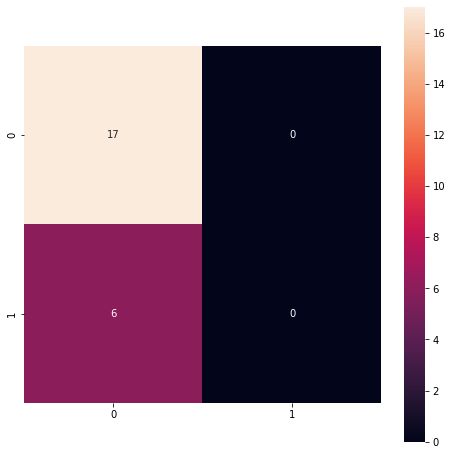

In [474]:
sns.heatmap(cm,square = True,annot = True)

In [411]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [417]:
classf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=4, random_state=0)
classf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=4, random_state=0)

In [418]:
y_predicted = classf.predict(X_test)

In [419]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [420]:
accuracy_score(y_predicted , y_test)

0.8260869565217391

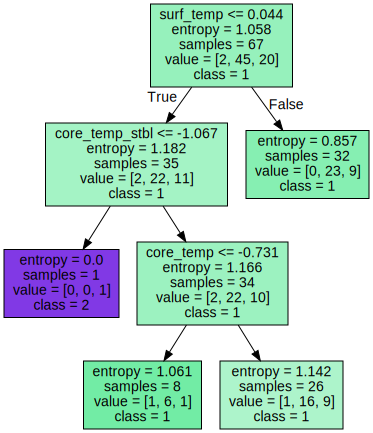

In [421]:
graph = Source(tree.export_graphviz(classf, out_file=None
   , feature_names=independent_variables, class_names=['0', '1' , '2'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [475]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [476]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [477]:
test_preds_  = classifier.predict(X_test)
train_preds_ = classifier.predict(X_train)

In [478]:
accuracy_score(y_test , test_preds_)

0.6086956521739131

In [479]:
confusion_matrix(y_test , test_preds_)

array([[ 0,  0,  0],
       [ 1, 14,  2],
       [ 0,  6,  0]])

In [460]:
feature_imp = pd.Series(classifier.feature_importances_, index = independent_variables).sort_values(ascending = False)
feature_imp

surf_temp         0.207769
comfort           0.178841
core_temp         0.166947
o2_satur          0.145001
surf_temp_stbl    0.139169
bp                0.060267
bp_stbl           0.059755
core_temp_stbl    0.042250
dtype: float64

In [480]:
from sklearn.svm import SVC
SVC_model = SVC().fit(X_train , y_train)

In [481]:
test_p = SVC_model.predict(X_test)

In [482]:
accuracy_score(test_p , y_test)

0.7391304347826086

In [437]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors = 13)
 
knn.fit(X_train, y_train)
pred = knn.predict(X_test)


In [438]:
accuracy_score(pred , y_test)

0.8695652173913043

In [439]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
 
print(classification_report(y_test, pred))

[[19  0]
 [ 3  1]]
              precision    recall  f1-score   support

           1       0.86      1.00      0.93        19
           2       1.00      0.25      0.40         4

    accuracy                           0.87        23
   macro avg       0.93      0.62      0.66        23
weighted avg       0.89      0.87      0.84        23



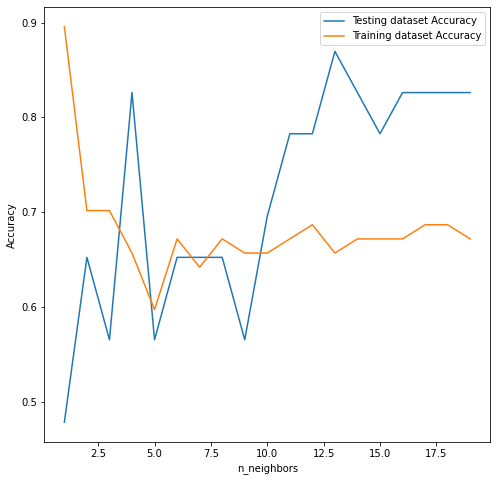

In [436]:
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
        
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [427]:
from sklearn.neighbors import KNeighborsClassifier

In [428]:
knn_model = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)

In [429]:
tst_p = knn_model.predict(X_test)

In [430]:
accuracy_score(y_test , tst_p)

0.8260869565217391